In [1]:
import numpy as np
import pandas as pd
import math   as m
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


from sklearn.metrics import mean_squared_error ,mean_absolute_error ,r2_score


In [2]:
df=pd.read_csv(r"C:\Users\barho\Downloads\archive (22)\online.csv")

In [3]:
df.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,162597.70,151377.59,443898.53,Ctg,191792.06
2,153441.51,101145.55,407934.54,Rangpur,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Rangpur,166187.94


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Marketing Spend  50 non-null     float64
 1   Administration   50 non-null     float64
 2   Transport        50 non-null     float64
 3   Area             50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
df.duplicated().sum()

0

In [6]:
df.describe()

,Marketing Spend,Administration,Transport,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


C:\Users\barho\AppData\Local\Temp\ipykernel_43236\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

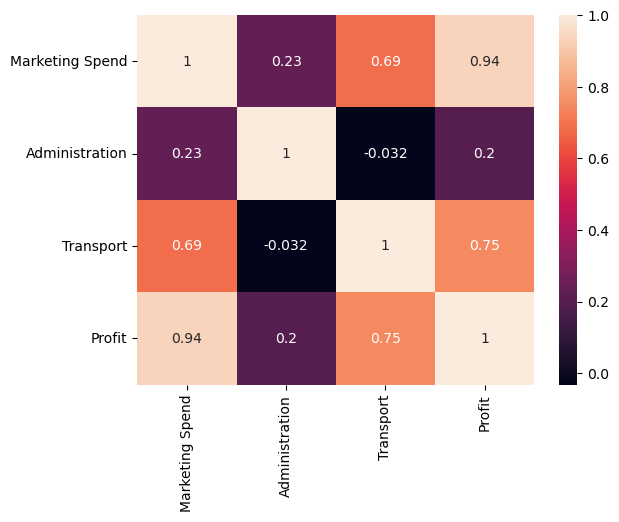

In [7]:
sns.heatmap(df.corr(),annot=True)

<Axes: >

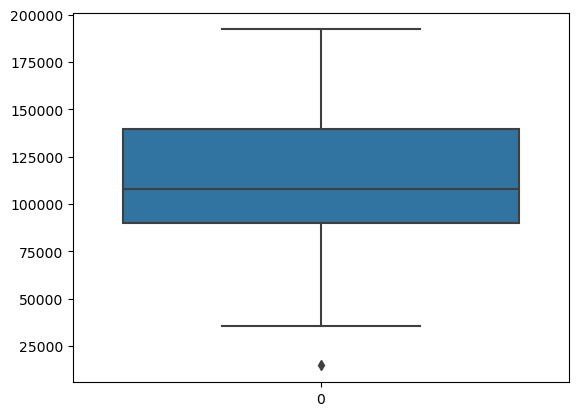

In [8]:
sns.boxplot(df.Profit)


<Axes: >

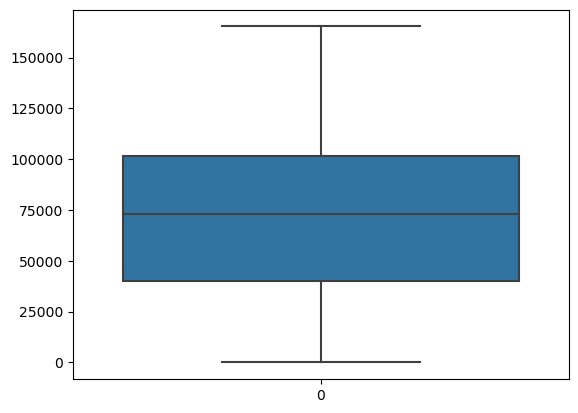

In [9]:
sns.boxplot(df['Marketing Spend'])


In [10]:
df.Area.value_counts()

Dhaka      17
Ctg        17
Rangpur    16
Name: Area, dtype: int64

<Axes: xlabel='Area', ylabel='count'>

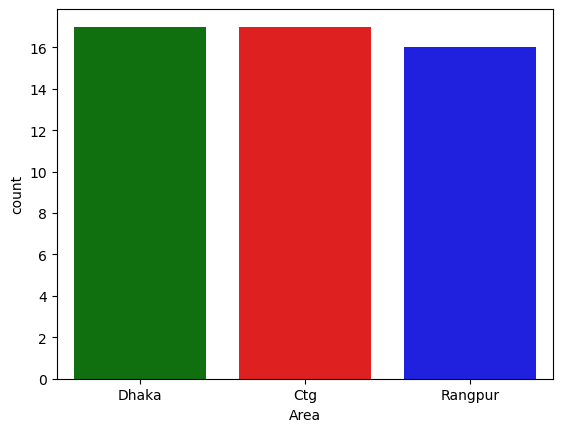

In [11]:
sns.countplot(x='Area',data=df,palette=['g','r','b'])

In [12]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df.Area = encoder.fit_transform(df.Area)
df.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,1,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,2,191050.39
3,144372.41,118671.85,383199.62,1,182901.99
4,142107.34,91391.77,366168.42,2,166187.94


In [13]:
df.columns

Index(['Marketing Spend', 'Administration', 'Transport', 'Area', 'Profit'], dtype='object')

In [14]:
x= df.drop("Profit", axis=1)
y=df[["Profit"]]

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)  


In [16]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [17]:
model1=LinearRegression()
model2=DecisionTreeRegressor()
model3=RandomForestRegressor()



In [18]:
def cal(model):
    model.fit(x_train,y_train)
    pre=model.predict(x_test)
    
    print(f"R2 Score =  {r2_score(y_test,pre) * 100:.2f}%")
    print('Mean Absolute Error = ',mean_absolute_error(y_test, pre))
    print('Mean Squared Error = ',mean_squared_error(y_test, pre))
    print('Root Mean Squared Error = ',m.sqrt(mean_squared_error(y_test, pre)))
    
    # Scatter plot for real and predict data
    plt.scatter(y_test,pre)
    return model
    

R2 Score =  83.90%
Mean Absolute Error =  9235.283383797372
Mean Squared Error =  130346316.80007759
Root Mean Squared Error =  11416.931146331644


LinearRegression()

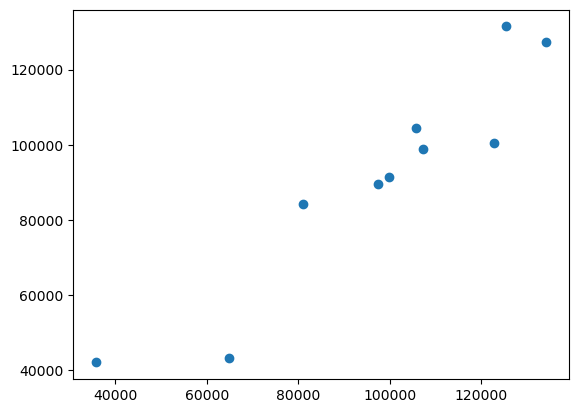

In [19]:
cal(model1)

R2 Score =  77.91%
Mean Absolute Error =  8899.483999999999
Mean Squared Error =  178916258.40206003
Root Mean Squared Error =  13375.958223695978


DecisionTreeRegressor()

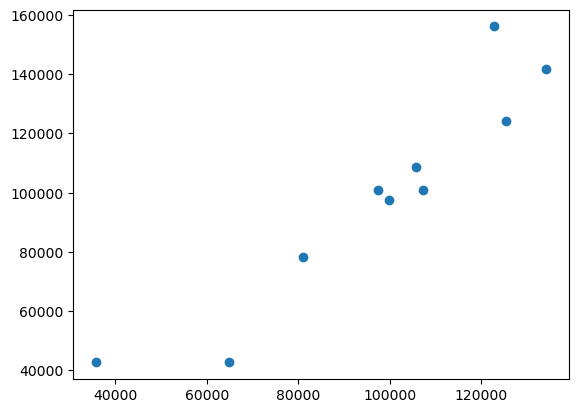

In [20]:
cal(model2)

C:\Users\barho\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


R2 Score =  90.13%
Mean Absolute Error =  6811.071509999971
Mean Squared Error =  79937108.18663742
Root Mean Squared Error =  8940.755459503263


RandomForestRegressor()

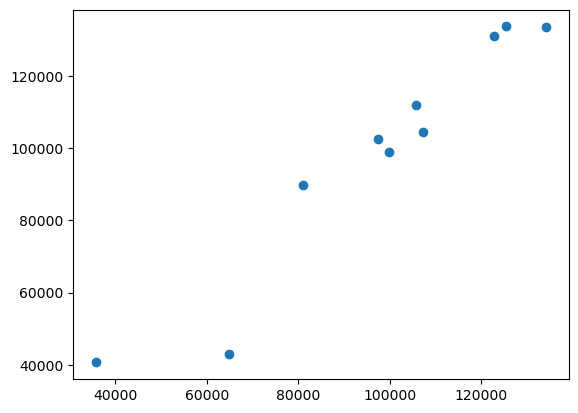

In [21]:

cal(model3)